# Iris Classification Project
**Author: Sarabjyot**  
This notebook implements a complete ML pipeline for the Iris dataset using different classifiers.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Load dataset
df = pd.read_csv('Iris.csv')

# Drop the 'Id' column if present
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Encode the species label
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [3]:
# Check for missing values and describe
print("Missing values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Descriptive statistics:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     150.000000    150.000000     150.000000    150.000000  150.000000
mean        5.843333      3.054000       3.758667      1.198667    1.000000
std         0.828066      0.433594       1.764420      0.763161    0.819232
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.350000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000


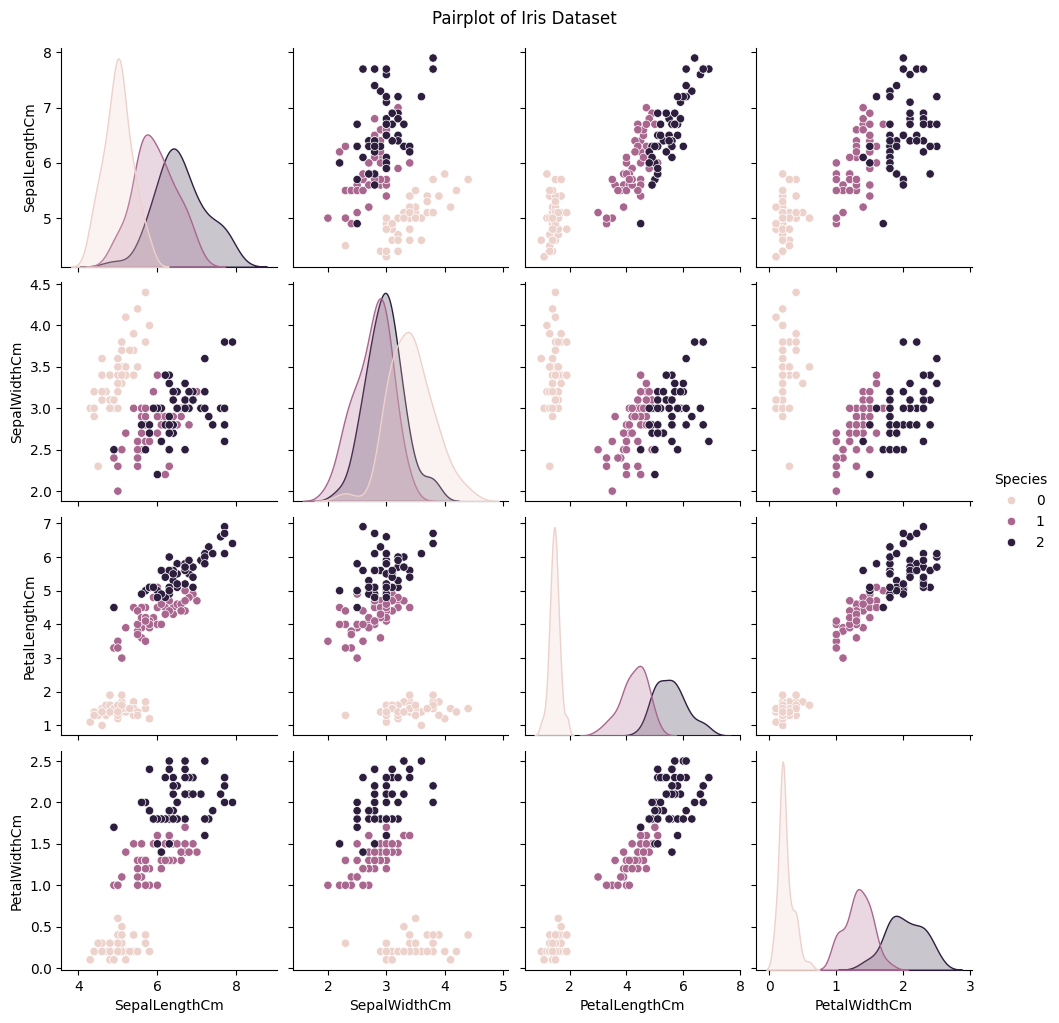

In [4]:
# Pairplot visualization
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

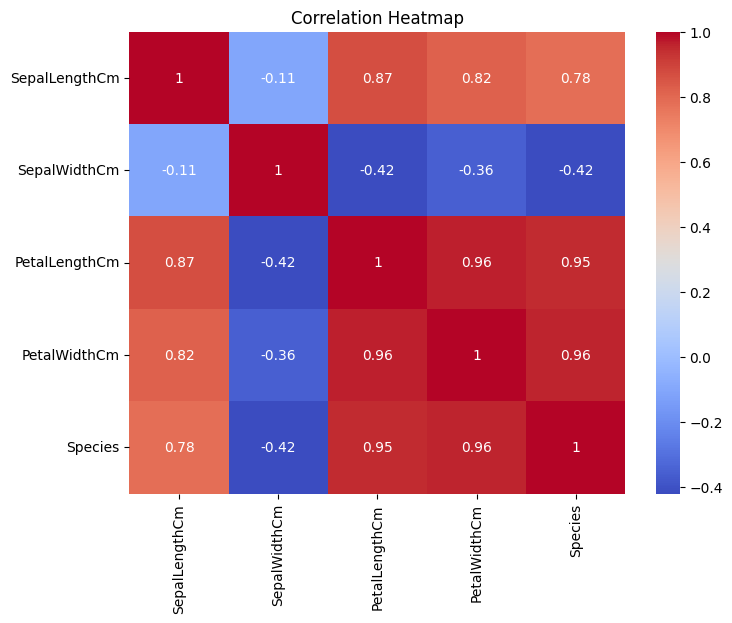

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# Feature and label preparation
X = df.drop('Species', axis=1)
y = df['Species']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [7]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0, gamma='scale')
}


Random Forest Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



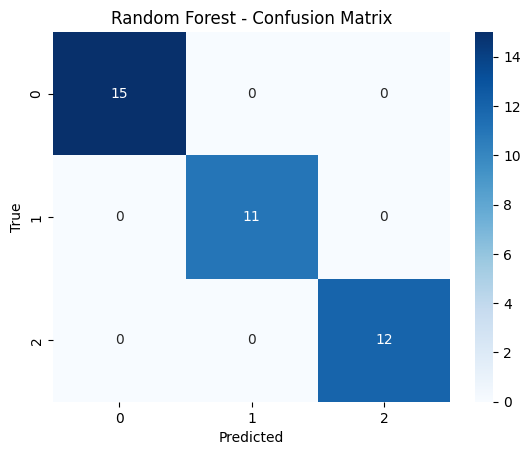


K-Nearest Neighbors Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



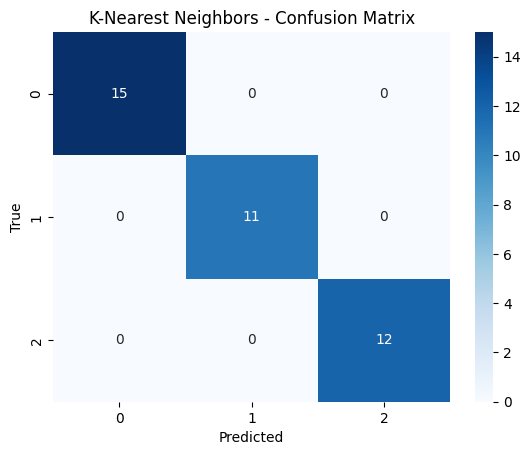


Support Vector Machine Accuracy: 1.0000
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



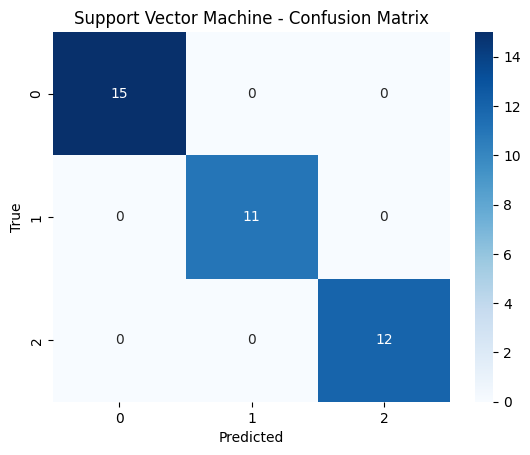

In [8]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions, target_names=le.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [9]:
# Cross-validation example with Random Forest
rf_scores = cross_val_score(models["Random Forest"], X_scaled, y, cv=5)
print(f"\nRandom Forest Cross-Validation Scores: {rf_scores}")
print(f"Average CV Accuracy: {rf_scores.mean():.4f}")


Random Forest Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average CV Accuracy: 0.9600
